In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
#from oe_acute import pyMNE

In [2]:
os.nice(1)

1

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/temporal_cnn_model/B1240/32x32/stim_resp_32x32_32/enc_test_32_units_15.npy')
stim_resp = np.load('/mnt/cube/srrudrar/temporal_cnn_model/B1240/32x32/stim_resp_32x32_32/resp_test_32.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((5706, 32), (5706, 214, 32))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=32, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 32

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((5706, 32), (5706, 214))

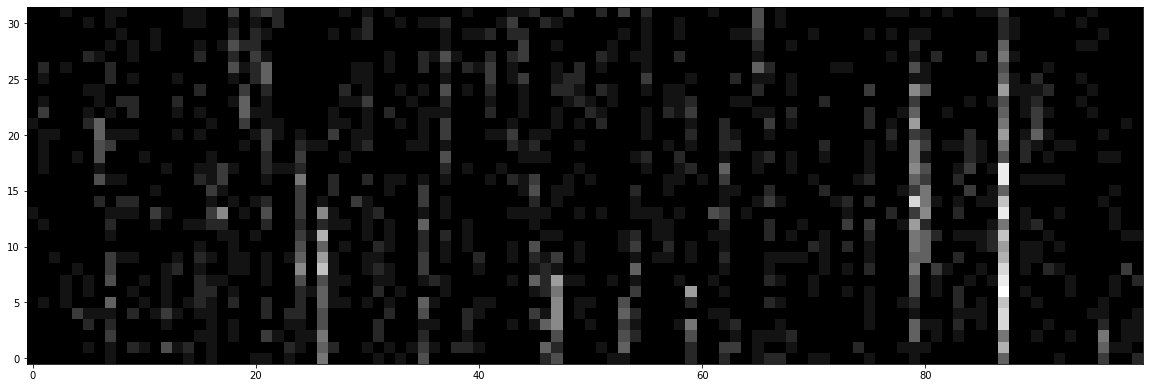

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/temporal_cnn_model/B1240/32x32/stim_resp_32x32_32/recon/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 32
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.152698
    2       0    0.151213
    3       0    0.149842
    4       0    0.151133
    5       1    0.148639
    6       0    0.148175
    7       0    0.146599
    8       0    0.144978
    9       0    0.145622
   10       1    0.146153
   11       2    0.148657
   12       3    0.150170
   13       4    0.147681
   14       5    0.147468
   15       6    0.147116
   16       7    0.146561
   17       8    0.146585
   18       9    0.147031
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.157326
    2       0    0.155792
    3       0    0.154924
    4       0    0.154385
    5       0    0.151622
    6       0    0.150705
    7       0    0.151284
    8       1    0.150264
    9       0    0.150748
   10       1    0.151628
   11       2    0.152203
   12       3    0.152176
   13       4    0.153229
   14       5    0.153657
   15       6    0.153279
   16       7    0.154224
   17       8    0.156321
   18       

    1       0    0.092821
    2       0    0.091529
    3       0    0.090402
    4       0    0.090151
    5       0    0.089321
    6       0    0.088852
    7       0    0.088747
    8       0    0.088232
    9       0    0.087903
   10       0    0.087720
   11       0    0.087795
   12       1    0.087637
   13       0    0.087641
   14       1    0.087387
   15       0    0.087432
   16       1    0.087348
   17       0    0.087414
   18       1    0.087251
   19       0    0.087325
   20       1    0.087401
   21       2    0.087547
   22       3    0.087514
   23       4    0.087608
   24       5    0.087686
   25       6    0.087834
   26       7    0.087925
   27       8    0.087860
   28       9    0.087777
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.104397
    2       0    0.102583
    3       0    0.101698
    4       0    0.101502
    5       0    0.100774
    6       0    0.099760
    7       0    0.099556
    8       0    0.098478
    9       

    5       0    0.101988
    6       0    0.102502
    7       1    0.103042
    8       2    0.102402
    9       3    0.103430
   10       4    0.103687
   11       5    0.103548
   12       6    0.103563
   13       7    0.103977
   14       8    0.104333
   15       9    0.103887
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.099121
    2       0    0.098149
    3       0    0.097526
    4       0    0.096710
    5       0    0.095883
    6       0    0.097138
    7       1    0.096907
    8       2    0.095648
    9       0    0.096020
   10       1    0.095998
   11       2    0.095579
   12       0    0.095109
   13       0    0.095365
   14       1    0.095113
   15       2    0.094950
   16       0    0.095045
   17       1    0.094780
   18       0    0.094807
   19       1    0.094913
   20       2    0.095094
   21       3    0.095074
   22       4    0.094967
   23       5    0.095221
   24       6    0.096273
   25       7    0.096505
   26       

    5       0    0.298288
    6       0    0.297371
    7       0    0.297093
    8       0    0.296021
    9       0    0.297459
   10       1    0.299193
   11       2    0.297732
   12       3    0.296327
   13       4    0.296166
   14       5    0.296244
   15       6    0.295887
   16       0    0.295427
   17       0    0.295373
   18       0    0.294903
   19       0    0.293843
   20       0    0.294007
   21       1    0.294090
   22       2    0.293894
   23       3    0.294323
   24       4    0.295272
   25       5    0.296196
   26       6    0.296368
   27       7    0.297311
   28       8    0.298123
   29       9    0.298188
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.304306
    2       0    0.294629
    3       0    0.292197
    4       0    0.290110
    5       0    0.289788
    6       0    0.285564
    7       0    0.289582
    8       1    0.290624
    9       2    0.289259
   10       3    0.288165
   11       4    0.286963
   12       

    7       1    0.164507
    8       0    0.164201
    9       0    0.164348
   10       1    0.164700
   11       2    0.164583
   12       3    0.164329
   13       4    0.164263
   14       5    0.164361
   15       6    0.164361
   16       7    0.164355
   17       8    0.164256
   18       9    0.164243
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.168311
    2       0    0.166814
    3       0    0.165884
    4       0    0.165809
    5       0    0.165961
    6       1    0.165328
    7       0    0.164841
    8       0    0.165065
    9       1    0.164893
   10       2    0.164381
   11       0    0.163969
   12       0    0.164419
   13       1    0.164119
   14       2    0.164471
   15       3    0.164668
   16       4    0.164382
   17       5    0.164364
   18       6    0.163888
   19       0    0.163735
   20       0    0.163995
   21       1    0.164127
   22       2    0.163741
   23       3    0.163664
   24       0    0.164023
   25       

   15       6    0.126603
   16       7    0.127049
   17       8    0.127190
   18       9    0.127826
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.313598
    2       0    0.311134
    3       0    0.311227
    4       1    0.309510
    5       0    0.308321
    6       0    0.307494
    7       0    0.306495
    8       0    0.306044
    9       0    0.306496
   10       1    0.305465
   11       0    0.307040
   12       1    0.307351
   13       2    0.308367
   14       3    0.308409
   15       4    0.308346
   16       5    0.307287
   17       6    0.307447
   18       7    0.307717
   19       8    0.308125
   20       9    0.307474
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.306484
    2       0    0.305168
    3       0    0.305682
    4       1    0.302235
    5       0    0.302801
    6       1    0.302658
    7       2    0.301096
    8       0    0.301260
    9       1    0.300387
   10       0    0.300904
   11       

   14       2    0.132988
   15       3    0.132916
   16       0    0.132827
   17       0    0.133696
   18       1    0.134159
   19       2    0.133842
   20       3    0.133903
   21       4    0.133897
   22       5    0.134229
   23       6    0.134275
   24       7    0.134448
   25       8    0.134751
   26       9    0.135112
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.135362
    2       0    0.135556
    3       0    0.135121
    4       0    0.134619
    5       0    0.135484
    6       1    0.134975
    7       2    0.134304
    8       0    0.134341
    9       1    0.134563
   10       2    0.133897
   11       0    0.133785
   12       0    0.134291
   13       1    0.134829
   14       2    0.135102
   15       3    0.136511
   16       4    0.136644
   17       5    0.136492
   18       6    0.136663
   19       7    0.136582
   20       8    0.136141
   21       9    0.136168
minimum of test set found
Iters   tally   ll(test) 
    1       

    3       0    0.587794
    4       0    0.585585
    5       0    0.584645
    6       0    0.582975
    7       0    0.581257
    8       0    0.581044
    9       0    0.580661
   10       0    0.577566
   11       0    0.577182
   12       0    0.576160
   13       0    0.576124
   14       0    0.575956
   15       0    0.575815
   16       0    0.575711
   17       0    0.575519
   18       0    0.575676
   19       1    0.575756
   20       2    0.575897
   21       3    0.576159
   22       4    0.576064
   23       5    0.575861
   24       6    0.575811
   25       7    0.576071
   26       8    0.577291
   27       9    0.577356
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.156068
    2       0    0.154380
    3       0    0.152150
    4       0    0.151422
    5       0    0.150916
    6       0    0.150797
    7       0    0.150815
    8       1    0.150584
    9       0    0.150284
   10       0    0.150260
   11       0    0.150927
   12       

    9       0    0.290157
   10       0    0.288388
   11       0    0.287855
   12       0    0.288012
   13       1    0.287645
   14       0    0.288030
   15       1    0.287657
   16       2    0.288179
   17       3    0.288417
   18       4    0.287753
   19       5    0.287947
   20       6    0.287769
   21       7    0.287520
   22       0    0.287958
   23       1    0.288004
   24       2    0.287687
   25       3    0.287861
   26       4    0.287999
   27       5    0.287493
   28       0    0.287352
   29       0    0.287456
   30       1    0.287860
   31       2    0.287784
   32       3    0.287441
   33       4    0.287474
   34       5    0.287409
   35       6    0.287638
   36       7    0.287768
   37       8    0.287654
   38       9    0.287531
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.058600
    2       0    0.055770
    3       0    0.054834
    4       0    0.055222
    5       1    0.054820
    6       0    0.054097
    7       

   30       5    0.410498
   31       6    0.410535
   32       7    0.410585
   33       8    0.410694
   34       9    0.410579
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.423741
    2       0    0.417889
    3       0    0.413113
    4       0    0.411329
    5       0    0.410756
    6       0    0.409321
    7       0    0.408868
    8       0    0.407780
    9       0    0.407519
   10       0    0.406941
   11       0    0.407006
   12       1    0.406654
   13       0    0.405832
   14       0    0.405644
   15       0    0.405227
   16       0    0.405047
   17       0    0.405057
   18       1    0.405108
   19       2    0.405087
   20       3    0.405689
   21       4    0.405874
   22       5    0.405553
   23       6    0.405327
   24       7    0.405418
   25       8    0.405551
   26       9    0.405481
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.079532
    2       0    0.078393
    3       0    0.076056
    4       

   13       1    0.120114
   14       2    0.119979
   15       0    0.119679
   16       0    0.119902
   17       1    0.120184
   18       2    0.120214
   19       3    0.120153
   20       4    0.119972
   21       5    0.120045
   22       6    0.120311
   23       7    0.120862
   24       8    0.121589
   25       9    0.122878
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.125331
    2       0    0.122760
    3       0    0.123123
    4       1    0.122162
    5       0    0.120191
    6       0    0.120484
    7       1    0.120620
    8       2    0.120287
    9       3    0.120587
   10       4    0.121855
   11       5    0.123096
   12       6    0.124533
   13       7    0.124181
   14       8    0.123060
   15       9    0.122972
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.112754
    2       0    0.110317
    3       0    0.109814
    4       0    0.109681
    5       0    0.109318
    6       0    0.109500
    7       

   10       0    0.196637
   11       0    0.196619
   12       0    0.196602
   13       0    0.196737
   14       1    0.196598
   15       0    0.196581
   16       0    0.196913
   17       1    0.196731
   18       2    0.196567
   19       0    0.196571
   20       1    0.196556
   21       0    0.196565
   22       1    0.196745
   23       2    0.197167
   24       3    0.197298
   25       4    0.197971
   26       5    0.198309
   27       6    0.198851
   28       7    0.199250
   29       8    0.199117
   30       9    0.199225
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.208336
    2       0    0.205548
    3       0    0.205742
    4       1    0.204513
    5       0    0.203396
    6       0    0.202732
    7       0    0.202571
    8       0    0.202378
    9       0    0.202308
   10       0    0.202262
   11       0    0.202470
   12       1    0.202236
   13       0    0.202582
   14       1    0.203272
   15       2    0.203222
   16       

   26       0    0.652336
   27       0    0.652347
   28       1    0.652335
   29       0    0.652304
   30       0    0.652316
   31       1    0.652377
   32       2    0.652372
   33       3    0.652562
   34       4    0.652639
   35       5    0.652678
   36       6    0.652747
   37       7    0.652806
   38       8    0.652817
   39       9    0.652864
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.157939
    2       0    0.155885
    3       0    0.153898
    4       0    0.150753
    5       0    0.149420
    6       0    0.149208
    7       0    0.149582
    8       1    0.149587
    9       2    0.148287
   10       0    0.147984
   11       0    0.147573
   12       0    0.148054
   13       1    0.148250
   14       2    0.147455
   15       0    0.147597
   16       1    0.147570
   17       2    0.147908
   18       3    0.148082
   19       4    0.148336
   20       5    0.148698
   21       6    0.148556
   22       7    0.148481
   23       

   29       9    0.185779
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.209847
    2       0    0.203537
    3       0    0.202466
    4       0    0.199538
    5       0    0.199877
    6       1    0.197760
    7       0    0.197470
    8       0    0.196709
    9       0    0.196436
   10       0    0.196188
   11       0    0.196288
   12       1    0.196794
   13       2    0.196680
   14       3    0.197553
   15       4    0.198391
   16       5    0.198520
   17       6    0.198577
   18       7    0.198721
   19       8    0.199358
   20       9    0.199477
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.148150
    2       0    0.146859
    3       0    0.146060
    4       0    0.144535
    5       0    0.144388
    6       0    0.144941
    7       1    0.144609
    8       2    0.145601
    9       3    0.146776
   10       4    0.146043
   11       5    0.146294
   12       6    0.146061
   13       7    0.146322
   14       

Iters   tally   ll(test) 
    1       0    0.473845
    2       0    0.468993
    3       0    0.467884
    4       0    0.466084
    5       0    0.465382
    6       0    0.464944
    7       0    0.464138
    8       0    0.463576
    9       0    0.463477
   10       0    0.463291
   11       0    0.462915
   12       0    0.462854
   13       0    0.462793
   14       0    0.462565
   15       0    0.462752
   16       1    0.463281
   17       2    0.462919
   18       3    0.463180
   19       4    0.463164
   20       5    0.463115
   21       6    0.463076
   22       7    0.463108
   23       8    0.463139
   24       9    0.463080
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.466715
    2       0    0.460380
    3       0    0.459407
    4       0    0.457168
    5       0    0.456677
    6       0    0.456685
    7       1    0.455636
    8       0    0.455054
    9       0    0.454956
   10       0    0.455129
   11       1    0.454539
   12       

   15       6    0.632646
   16       7    0.633022
   17       8    0.633885
   18       9    0.634549
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.645425
    2       0    0.644250
    3       0    0.642895
    4       0    0.640526
    5       0    0.639536
    6       0    0.638843
    7       0    0.638719
    8       0    0.638546
    9       0    0.638570
   10       1    0.638451
   11       0    0.638199
   12       0    0.638224
   13       1    0.638381
   14       2    0.638951
   15       3    0.638787
   16       4    0.638680
   17       5    0.638582
   18       6    0.638557
   19       7    0.638610
   20       8    0.638735
   21       9    0.638668
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.161588
    2       0    0.158603
    3       0    0.157298
    4       0    0.157612
    5       1    0.156040
    6       0    0.154852
    7       0    0.155208
    8       1    0.154876
    9       2    0.154713
   10       

    5       0    0.408372
    6       0    0.406091
    7       0    0.405148
    8       0    0.404180
    9       0    0.404026
   10       0    0.403888
   11       0    0.403856
   12       0    0.403636
   13       0    0.403469
   14       0    0.403431
   15       0    0.403305
   16       0    0.403055
   17       0    0.402893
   18       0    0.402743
   19       0    0.402483
   20       0    0.402547
   21       1    0.402984
   22       2    0.403199
   23       3    0.403639
   24       4    0.404167
   25       5    0.404501
   26       6    0.404524
   27       7    0.404574
   28       8    0.404458
   29       9    0.404520
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.406104
    2       0    0.402452
    3       0    0.398915
    4       0    0.398308
    5       0    0.396536
    6       0    0.394568
    7       0    0.394804
    8       1    0.393804
    9       0    0.393523
   10       0    0.393339
   11       0    0.391948
   12       

   18       2    0.185663
   19       3    0.185401
   20       4    0.185497
   21       5    0.185726
   22       6    0.186514
   23       7    0.186897
   24       8    0.187668
   25       9    0.188132
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.216426
    2       0    0.212279
    3       0    0.207393
    4       0    0.205790
    5       0    0.205604
    6       0    0.204293
    7       0    0.202692
    8       0    0.202254
    9       0    0.202492
   10       1    0.202769
   11       2    0.202140
   12       0    0.203194
   13       1    0.203747
   14       2    0.202978
   15       3    0.202784
   16       4    0.202682
   17       5    0.202585
   18       6    0.202485
   19       7    0.202175
   20       8    0.202337
   21       9    0.202663
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.190571
    2       0    0.191625
    3       0    0.186371
    4       0    0.183653
    5       0    0.183507
    6       

   32       4    0.319191
   33       5    0.319107
   34       6    0.319794
   35       7    0.320324
   36       8    0.320062
   37       9    0.319825
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.093703
    2       0    0.095479
    3       0    0.093301
    4       0    0.092128
    5       0    0.090985
    6       0    0.092826
    7       1    0.093549
    8       2    0.091971
    9       3    0.091655
   10       4    0.092492
   11       5    0.094117
   12       6    0.094491
   13       7    0.095022
   14       8    0.094380
   15       9    0.093077
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.078085
    2       0    0.076594
    3       0    0.076141
    4       0    0.075260
    5       0    0.074402
    6       0    0.074224
    7       0    0.075187
    8       1    0.076746
    9       2    0.076003
   10       3    0.075796
   11       4    0.076189
   12       5    0.076132
   13       6    0.076097
   14       

    2       0    0.151783
    3       0    0.152037
    4       1    0.152299
    5       2    0.151312
    6       0    0.150704
    7       0    0.150583
    8       0    0.151070
    9       1    0.151374
   10       2    0.151590
   11       3    0.151520
   12       4    0.151581
   13       5    0.151903
   14       6    0.152578
   15       7    0.153332
   16       8    0.153458
   17       9    0.153550
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.161656
    2       0    0.161394
    3       0    0.160516
    4       0    0.159103
    5       0    0.158283
    6       0    0.157643
    7       0    0.156856
    8       0    0.156819
    9       0    0.156952
   10       1    0.157411
   11       2    0.157646
   12       3    0.157520
   13       4    0.157754
   14       5    0.157474
   15       6    0.157470
   16       7    0.157556
   17       8    0.157598
   18       9    0.157636
minimum of test set found
Iters   tally   ll(test) 
    1       

   14       0    0.210790
   15       0    0.209867
   16       0    0.210507
   17       1    0.209862
   18       0    0.211186
   19       1    0.211403
   20       2    0.209856
   21       0    0.209030
   22       0    0.208582
   23       0    0.208772
   24       1    0.208271
   25       0    0.208400
   26       1    0.208661
   27       2    0.208265
   28       0    0.208554
   29       1    0.207851
   30       0    0.208882
   31       1    0.208263
   32       2    0.209144
   33       3    0.209115
   34       4    0.209461
   35       5    0.209232
   36       6    0.210223
   37       7    0.210327
   38       8    0.211597
   39       9    0.212447
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.229052
    2       0    0.225357
    3       0    0.221220
    4       0    0.218597
    5       0    0.218951
    6       1    0.215919
    7       0    0.216652
    8       1    0.215314
    9       0    0.214570
   10       0    0.216085
   11       

    5       0    0.545966
    6       0    0.544837
    7       0    0.544022
    8       0    0.543601
    9       0    0.543602
   10       1    0.543569
   11       0    0.543030
   12       0    0.542832
   13       0    0.542932
   14       1    0.542929
   15       2    0.542957
   16       3    0.543087
   17       4    0.542994
   18       5    0.542912
   19       6    0.543122
   20       7    0.543280
   21       8    0.543170
   22       9    0.543523
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.547080
    2       0    0.544911
    3       0    0.543530
    4       0    0.542105
    5       0    0.541526
    6       0    0.541507
    7       0    0.540773
    8       0    0.540599
    9       0    0.540152
   10       0    0.540107
   11       0    0.539971
   12       0    0.539568
   13       0    0.539186
   14       0    0.539139
   15       0    0.538892
   16       0    0.538616
   17       0    0.538588
   18       0    0.538540
   19       

   15       1    0.305426
   16       2    0.306241
   17       3    0.305830
   18       4    0.305989
   19       5    0.306187
   20       6    0.306647
   21       7    0.307286
   22       8    0.307979
   23       9    0.308638
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.653007
    2       0    0.649296
    3       0    0.648364
    4       0    0.646556
    5       0    0.644991
    6       0    0.644542
    7       0    0.644802
    8       1    0.643130
    9       0    0.642636
   10       0    0.641922
   11       0    0.641290
   12       0    0.640927
   13       0    0.640827
   14       0    0.640568
   15       0    0.640438
   16       0    0.640396
   17       0    0.640278
   18       0    0.640231
   19       0    0.640253
   20       1    0.640287
   21       2    0.639997
   22       0    0.639986
   23       0    0.639740
   24       0    0.639754
   25       1    0.639809
   26       2    0.639679
   27       0    0.639499
   28       

   19       3    0.228909
   20       4    0.229955
   21       5    0.230218
   22       6    0.230720
   23       7    0.230707
   24       8    0.230975
   25       9    0.230920
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.219378
    2       0    0.219595
    3       0    0.219294
    4       0    0.215696
    5       0    0.214699
    6       0    0.214439
    7       0    0.215013
    8       1    0.215420
    9       2    0.214794
   10       3    0.214036
   11       0    0.215017
   12       1    0.216192
   13       2    0.216098
   14       3    0.216573
   15       4    0.216655
   16       5    0.215521
   17       6    0.215259
   18       7    0.215655
   19       8    0.215462
   20       9    0.215016
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.233599
    2       0    0.231247
    3       0    0.230863
    4       0    0.228726
    5       0    0.227199
    6       0    0.226880
    7       0    0.226681
    8       

   20       7    0.377752
   21       8    0.377667
   22       9    0.377473
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.398076
    2       0    0.396077
    3       0    0.393318
    4       0    0.391819
    5       0    0.391433
    6       0    0.390657
    7       0    0.389935
    8       0    0.389599
    9       0    0.389621
   10       1    0.389017
   11       0    0.388344
   12       0    0.388696
   13       1    0.388549
   14       2    0.388551
   15       3    0.388163
   16       0    0.388454
   17       1    0.388394
   18       2    0.387909
   19       0    0.387636
   20       0    0.387718
   21       1    0.387749
   22       2    0.387707
   23       3    0.387915
   24       4    0.388123
   25       5    0.389343
   26       6    0.389660
   27       7    0.390138
   28       8    0.390352
   29       9    0.391057
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.398096
    2       0    0.395685
    3       

    3       0    0.467352
    4       0    0.464980
    5       0    0.464010
    6       0    0.463278
    7       0    0.462616
    8       0    0.462462
    9       0    0.462467
   10       1    0.461392
   11       0    0.461455
   12       1    0.461482
   13       2    0.461709
   14       3    0.462164
   15       4    0.462246
   16       5    0.461551
   17       6    0.461537
   18       7    0.461657
   19       8    0.461853
   20       9    0.461778
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.487242
    2       0    0.481591
    3       0    0.479717
    4       0    0.478076
    5       0    0.476116
    6       0    0.475402
    7       0    0.474335
    8       0    0.473382
    9       0    0.473427
   10       1    0.473503
   11       2    0.473217
   12       0    0.472788
   13       0    0.472421
   14       0    0.472317
   15       0    0.472486
   16       1    0.472686
   17       2    0.472216
   18       0    0.471714
   19       

   10       0    0.184453
   11       1    0.184720
   12       2    0.185995
   13       3    0.186369
   14       4    0.186639
   15       5    0.186843
   16       6    0.187217
   17       7    0.186831
   18       8    0.187035
   19       9    0.186769
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.211648
    2       0    0.210367
    3       0    0.210515
    4       1    0.207968
    5       0    0.206974
    6       0    0.205324
    7       0    0.206375
    8       1    0.207441
    9       2    0.206726
   10       3    0.205590
   11       4    0.205988
   12       5    0.205769
   13       6    0.205078
   14       0    0.205749
   15       1    0.206586
   16       2    0.205879
   17       3    0.206357
   18       4    0.206945
   19       5    0.206746
   20       6    0.206651
   21       7    0.207158
   22       8    0.207212
   23       9    0.206990
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.198371
    2       

    9       0    0.288579
   10       0    0.287752
   11       0    0.287043
   12       0    0.287441
   13       1    0.287721
   14       2    0.286427
   15       0    0.286074
   16       0    0.286594
   17       1    0.288383
   18       2    0.287313
   19       3    0.287160
   20       4    0.287049
   21       5    0.287507
   22       6    0.287799
   23       7    0.287633
   24       8    0.288111
   25       9    0.288384
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.300695
    2       0    0.303805
    3       0    0.301903
    4       0    0.294354
    5       0    0.294268
    6       0    0.293952
    7       0    0.292572
    8       0    0.291620
    9       0    0.291208
   10       0    0.293067
   11       1    0.293686
   12       2    0.293069
   13       3    0.292893
   14       4    0.293198
   15       5    0.292999
   16       6    0.292665
   17       7    0.292561
   18       8    0.293059
   19       9    0.293252
minimum of t

   13       0    0.304250
   14       0    0.304479
   15       1    0.304730
   16       2    0.306324
   17       3    0.308551
   18       4    0.307735
   19       5    0.307286
   20       6    0.306919
   21       7    0.306902
   22       8    0.306809
   23       9    0.306755
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.301180
    2       0    0.299896
    3       0    0.296803
    4       0    0.294685
    5       0    0.293579
    6       0    0.293956
    7       1    0.293850
    8       2    0.292663
    9       0    0.292046
   10       0    0.291633
   11       0    0.291224
   12       0    0.291473
   13       1    0.291254
   14       2    0.290547
   15       0    0.290602
   16       1    0.290761
   17       2    0.290651
   18       3    0.290853
   19       4    0.290713
   20       5    0.290583
   21       6    0.290593
   22       7    0.290490
   23       0    0.290810
   24       1    0.291092
   25       2    0.290937
   26       

    6       1    0.202462
    7       0    0.201852
    8       0    0.201678
    9       0    0.202065
   10       1    0.202642
   11       2    0.202543
   12       3    0.202752
   13       4    0.202935
   14       5    0.202922
   15       6    0.202925
   16       7    0.202938
   17       8    0.203063
   18       9    0.204168
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.213388
    2       0    0.214091
    3       0    0.212942
    4       0    0.211597
    5       0    0.210627
    6       0    0.209439
    7       0    0.209204
    8       0    0.208739
    9       0    0.208265
   10       0    0.207732
   11       0    0.207808
   12       1    0.207986
   13       2    0.208091
   14       3    0.208352
   15       4    0.208288
   16       5    0.207875
   17       6    0.207816
   18       7    0.207744
   19       8    0.208174
   20       9    0.208298
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.200903
    2       

    2       0    0.241752
    3       0    0.233301
    4       0    0.230208
    5       0    0.230738
    6       1    0.230491
    7       2    0.229061
    8       0    0.229128
    9       1    0.228456
   10       0    0.229406
   11       1    0.229738
   12       2    0.229846
   13       3    0.229043
   14       4    0.229296
   15       5    0.229476
   16       6    0.229190
   17       7    0.228838
   18       8    0.229179
   19       9    0.229250
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.250514
    2       0    0.245347
    3       0    0.242189
    4       0    0.240861
    5       0    0.239090
    6       0    0.237738
    7       0    0.237347
    8       0    0.237769
    9       1    0.237825
   10       2    0.237141
   11       0    0.237135
   12       0    0.237247
   13       1    0.237455
   14       2    0.237515
   15       3    0.237690
   16       4    0.237864
   17       5    0.238337
   18       6    0.239194
   19       

   18       3    0.082899
   19       4    0.083380
   20       5    0.083606
   21       6    0.083416
   22       7    0.083439
   23       8    0.083466
   24       9    0.083431
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.085856
    2       0    0.085454
    3       0    0.083998
    4       0    0.083640
    5       0    0.083611
    6       0    0.084354
    7       1    0.084996
    8       2    0.085121
    9       3    0.084926
   10       4    0.084745
   11       5    0.084322
   12       6    0.084085
   13       7    0.083632
   14       8    0.083741
   15       9    0.083944
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.549285
    2       0    0.546245
    3       0    0.543067
    4       0    0.540435
    5       0    0.539892
    6       0    0.538678
    7       0    0.537815
    8       0    0.537600
    9       0    0.536264
   10       0    0.535784
   11       0    0.535554
   12       0    0.535269
   13       

   25       2    0.280057
   26       3    0.279760
   27       4    0.279753
   28       5    0.279536
   29       0    0.279454
   30       0    0.279633
   31       1    0.279793
   32       2    0.279629
   33       3    0.279616
   34       4    0.279665
   35       5    0.279621
   36       6    0.279543
   37       7    0.279529
   38       8    0.279404
   39       0    0.279356
   40       0    0.279405
   41       1    0.279575
   42       2    0.279548
   43       3    0.279679
   44       4    0.279861
   45       5    0.279907
   46       6    0.280078
   47       7    0.280081
   48       8    0.279999
   49       9    0.280077
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.280008
    2       0    0.278637
    3       0    0.276219
    4       0    0.273498
    5       0    0.272580
    6       0    0.271555
    7       0    0.271106
    8       0    0.271424
    9       1    0.271241
   10       2    0.270407
   11       0    0.270172
   12       

   23       6    0.620055
   24       7    0.619829
   25       8    0.619817
   26       9    0.619997
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.642331
    2       0    0.636531
    3       0    0.634838
    4       0    0.634115
    5       0    0.632235
    6       0    0.628642
    7       0    0.628139
    8       0    0.628108
    9       0    0.628369
   10       1    0.628242
   11       2    0.628320
   12       3    0.628210
   13       4    0.627898
   14       0    0.627426
   15       0    0.627337
   16       0    0.627213
   17       0    0.627347
   18       1    0.627439
   19       2    0.627049
   20       0    0.626721
   21       0    0.626738
   22       1    0.627079
   23       2    0.627289
   24       3    0.627006
   25       4    0.626636
   26       0    0.626528
   27       0    0.627421
   28       1    0.628590
   29       2    0.629623
   30       3    0.629219
   31       4    0.628529
   32       5    0.628369
   33       

   10       3    0.201620
   11       4    0.201157
   12       5    0.200710
   13       0    0.201663
   14       1    0.203969
   15       2    0.205566
   16       3    0.204241
   17       4    0.204139
   18       5    0.204770
   19       6    0.205062
   20       7    0.204857
   21       8    0.204383
   22       9    0.204061
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.206475
    2       0    0.206396
    3       0    0.204895
    4       0    0.203042
    5       0    0.202293
    6       0    0.202939
    7       1    0.202656
    8       2    0.201537
    9       0    0.201287
   10       0    0.200889
   11       0    0.200284
   12       0    0.200775
   13       1    0.200893
   14       2    0.200313
   15       3    0.200058
   16       0    0.200933
   17       1    0.201253
   18       2    0.201306
   19       3    0.200992
   20       4    0.201009
   21       5    0.201227
   22       6    0.201149
   23       7    0.201074
   24       

    4       0    0.171342
    5       0    0.171662
    6       1    0.172898
    7       2    0.174738
    8       3    0.176061
    9       4    0.176975
   10       5    0.175652
   11       6    0.175546
   12       7    0.175218
   13       8    0.174353
   14       9    0.174416
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.186268
    2       0    0.184656
    3       0    0.183423
    4       0    0.183123
    5       0    0.182942
    6       0    0.183793
    7       1    0.184078
    8       2    0.185621
    9       3    0.186212
   10       4    0.185971
   11       5    0.185565
   12       6    0.185209
   13       7    0.185196
   14       8    0.184933
   15       9    0.184778
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.083944
    2       0    0.082859
    3       0    0.081918
    4       0    0.080885
    5       0    0.081261
    6       1    0.080408
    7       0    0.080311
    8       0    0.083478
    9       

   16       8    0.258078
   17       9    0.257913
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.258094
    2       0    0.256920
    3       0    0.256230
    4       0    0.255193
    5       0    0.254909
    6       0    0.253338
    7       0    0.253477
    8       1    0.254186
    9       2    0.252802
   10       0    0.252966
   11       1    0.253408
   12       2    0.253678
   13       3    0.253826
   14       4    0.254244
   15       5    0.255097
   16       6    0.254799
   17       7    0.254563
   18       8    0.255087
   19       9    0.255250
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.279520
    2       0    0.278333
    3       0    0.278479
    4       1    0.278956
    5       2    0.278486
    6       3    0.277819
    7       0    0.277393
    8       0    0.277958
    9       1    0.278292
   10       2    0.280936
   11       3    0.282903
   12       4    0.282298
   13       5    0.282151
   14       

   34       2    0.423613
   35       3    0.423580
   36       4    0.423562
   37       5    0.423463
   38       0    0.423513
   39       1    0.423621
   40       2    0.423669
   41       3    0.423715
   42       4    0.424013
   43       5    0.424164
   44       6    0.424252
   45       7    0.424310
   46       8    0.424256
   47       9    0.424225
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.453334
    2       0    0.449279
    3       0    0.445428
    4       0    0.444728
    5       0    0.442269
    6       0    0.440303
    7       0    0.437678
    8       0    0.437497
    9       0    0.435174
   10       0    0.434274
   11       0    0.433837
   12       0    0.433998
   13       1    0.432842
   14       0    0.432701
   15       0    0.432787
   16       1    0.432516
   17       0    0.432369
   18       0    0.432058
   19       0    0.431229
   20       0    0.430887
   21       0    0.430780
   22       0    0.430874
   23       

    8       0    0.504370
    9       0    0.503876
   10       0    0.503543
   11       0    0.503433
   12       0    0.502626
   13       0    0.502047
   14       0    0.501914
   15       0    0.501871
   16       0    0.501996
   17       1    0.501949
   18       2    0.501899
   19       3    0.501949
   20       4    0.501844
   21       0    0.502016
   22       1    0.502366
   23       2    0.502119
   24       3    0.501723
   25       0    0.501571
   26       0    0.501939
   27       1    0.502075
   28       2    0.502038
   29       3    0.501822
   30       4    0.502134
   31       5    0.503027
   32       6    0.503372
   33       7    0.503568
   34       8    0.503934
   35       9    0.503932
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.523225
    2       0    0.521556
    3       0    0.518244
    4       0    0.516898
    5       0    0.515488
    6       0    0.516009
    7       1    0.515848
    8       2    0.514945
    9       

   35       7    0.130483
   36       8    0.130559
   37       9    0.130460
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.138947
    2       0    0.139024
    3       0    0.136948
    4       0    0.135591
    5       0    0.134304
    6       0    0.133913
    7       0    0.133278
    8       0    0.132982
    9       0    0.133384
   10       1    0.133020
   11       2    0.132730
   12       0    0.132407
   13       0    0.132400
   14       0    0.132477
   15       1    0.132331
   16       0    0.132469
   17       1    0.132611
   18       2    0.132223
   19       0    0.132889
   20       1    0.133311
   21       2    0.133776
   22       3    0.133288
   23       4    0.133482
   24       5    0.133578
   25       6    0.134397
   26       7    0.134591
   27       8    0.134129
   28       9    0.134248
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.146081
    2       0    0.143537
    3       0    0.141434
    4       

    8       1    0.640430
    9       0    0.639747
   10       0    0.639725
   11       0    0.639566
   12       0    0.638917
   13       0    0.639305
   14       1    0.639370
   15       2    0.639392
   16       3    0.639046
   17       4    0.639014
   18       5    0.638586
   19       0    0.638946
   20       1    0.639386
   21       2    0.639186
   22       3    0.638340
   23       0    0.638334
   24       0    0.638432
   25       1    0.639111
   26       2    0.638930
   27       3    0.638588
   28       4    0.638566
   29       5    0.638973
   30       6    0.639474
   31       7    0.639449
   32       8    0.639515
   33       9    0.639409
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.646507
    2       0    0.644286
    3       0    0.639787
    4       0    0.638400
    5       0    0.636657
    6       0    0.635946
    7       0    0.632964
    8       0    0.632130
    9       0    0.631958
   10       0    0.630862
   11       

    2       0    0.652594
    3       0    0.650276
    4       0    0.649793
    5       0    0.649939
    6       1    0.651051
    7       2    0.649949
    8       3    0.649530
    9       0    0.648711
   10       0    0.648614
   11       0    0.648253
   12       0    0.647877
   13       0    0.648058
   14       1    0.648273
   15       2    0.648799
   16       3    0.648973
   17       4    0.648909
   18       5    0.649093
   19       6    0.649286
   20       7    0.649242
   21       8    0.649140
   22       9    0.649177
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.649034
    2       0    0.644660
    3       0    0.644590
    4       0    0.643734
    5       0    0.642595
    6       0    0.642142
    7       0    0.641620
    8       0    0.641153
    9       0    0.640428
   10       0    0.639983
   11       0    0.640083
   12       1    0.640618
   13       2    0.640643
   14       3    0.641172
   15       4    0.641447
   16       

   23       0    0.570940
   24       1    0.571109
   25       2    0.570898
   26       3    0.570603
   27       0    0.570597
   28       0    0.570760
   29       1    0.570790
   30       2    0.570784
   31       3    0.570700
   32       4    0.570830
   33       5    0.571251
   34       6    0.571706
   35       7    0.571353
   36       8    0.571197
   37       9    0.571175
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.593120
    2       0    0.588309
    3       0    0.585458
    4       0    0.584626
    5       0    0.580765
    6       0    0.579847
    7       0    0.578977
    8       0    0.578957
    9       0    0.578945
   10       0    0.578411
   11       0    0.577965
   12       0    0.577630
   13       0    0.577250
   14       0    0.576728
   15       0    0.576318
   16       0    0.576173
   17       0    0.576893
   18       1    0.577122
   19       2    0.577428
   20       3    0.577276
   21       4    0.577297
   22       

   12       0    0.582489
   13       0    0.582401
   14       0    0.582345
   15       0    0.582230
   16       0    0.582005
   17       0    0.581893
   18       0    0.582319
   19       1    0.582773
   20       2    0.583471
   21       3    0.583089
   22       4    0.582557
   23       5    0.582549
   24       6    0.582535
   25       7    0.582514
   26       8    0.582502
   27       9    0.582626
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.586827
    2       0    0.582697
    3       0    0.580964
    4       0    0.579364
    5       0    0.578031
    6       0    0.577883
    7       0    0.577750
    8       0    0.576725
    9       0    0.575298
   10       0    0.575152
   11       0    0.575164
   12       1    0.575225
   13       2    0.574934
   14       0    0.574679
   15       0    0.574553
   16       0    0.574659
   17       1    0.574730
   18       2    0.574740
   19       3    0.574698
   20       4    0.574681
   21       

    1       0    0.192886
    2       0    0.187458
    3       0    0.184746
    4       0    0.183735
    5       0    0.183462
    6       0    0.182512
    7       0    0.180939
    8       0    0.179578
    9       0    0.179498
   10       0    0.179237
   11       0    0.178609
   12       0    0.178289
   13       0    0.178048
   14       0    0.177818
   15       0    0.177875
   16       1    0.178645
   17       2    0.179175
   18       3    0.178416
   19       4    0.177916
   20       5    0.177625
   21       0    0.177452
   22       0    0.177844
   23       1    0.178539
   24       2    0.178916
   25       3    0.180026
   26       4    0.180197
   27       5    0.180454
   28       6    0.180664
   29       7    0.180670
   30       8    0.180794
   31       9    0.181300
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.178173
    2       0    0.176191
    3       0    0.174572
    4       0    0.173999
    5       0    0.173416
    6       

    2       0    0.274181
    3       0    0.275421
    4       1    0.274151
    5       0    0.272115
    6       0    0.273182
    7       1    0.272592
    8       2    0.271180
    9       0    0.271306
   10       1    0.271717
   11       2    0.271508
   12       3    0.271957
   13       4    0.273063
   14       5    0.272426
   15       6    0.272005
   16       7    0.271726
   17       8    0.272330
   18       9    0.272457
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.264952
    2       0    0.262959
    3       0    0.263151
    4       1    0.263132
    5       2    0.262024
    6       0    0.261639
    7       0    0.261308
    8       0    0.261168
    9       0    0.260721
   10       0    0.260155
   11       0    0.260141
   12       0    0.260486
   13       1    0.260711
   14       2    0.260755
   15       3    0.260712
   16       4    0.260875
   17       5    0.261332
   18       6    0.261936
   19       7    0.261988
   20       

    9       3    0.246733
   10       0    0.247009
   11       1    0.247638
   12       2    0.247790
   13       3    0.246509
   14       0    0.246440
   15       0    0.246518
   16       1    0.246641
   17       2    0.247641
   18       3    0.248282
   19       4    0.247579
   20       5    0.246563
   21       6    0.246503
   22       7    0.246629
   23       8    0.246740
   24       9    0.246539
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.263889
    2       0    0.259306
    3       0    0.257937
    4       0    0.256166
    5       0    0.255250
    6       0    0.253767
    7       0    0.254646
    8       1    0.255908
    9       2    0.257051
   10       3    0.257461
   11       4    0.258089
   12       5    0.258319
   13       6    0.259274
   14       7    0.259950
   15       8    0.258933
   16       9    0.258785
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.263935
    2       0    0.256385
    3       

    8       0    0.305877
    9       0    0.305679
   10       0    0.305706
   11       1    0.306529
   12       2    0.306657
   13       3    0.307576
   14       4    0.307931
   15       5    0.307372
   16       6    0.306963
   17       7    0.306627
   18       8    0.306621
   19       9    0.306880
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.315065
    2       0    0.310406
    3       0    0.309026
    4       0    0.307788
    5       0    0.307451
    6       0    0.306362
    7       0    0.306748
    8       1    0.305711
    9       0    0.304577
   10       0    0.303976
   11       0    0.303383
   12       0    0.303047
   13       0    0.302018
   14       0    0.301643
   15       0    0.301833
   16       1    0.301802
   17       2    0.301580
   18       0    0.301411
   19       0    0.301584
   20       1    0.301778
   21       2    0.302104
   22       3    0.302175
   23       4    0.302654
   24       5    0.302626
   25       

    5       0    0.168197
    6       0    0.167877
    7       0    0.168147
    8       1    0.167888
    9       2    0.167017
   10       0    0.166157
   11       0    0.166015
   12       0    0.165942
   13       0    0.165960
   14       1    0.165774
   15       0    0.165500
   16       0    0.165371
   17       0    0.165290
   18       0    0.165294
   19       1    0.165376
   20       2    0.165463
   21       3    0.165360
   22       4    0.165400
   23       5    0.165480
   24       6    0.165477
   25       7    0.165515
   26       8    0.165555
   27       9    0.165525
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.167376
    2       0    0.166520
    3       0    0.164347
    4       0    0.164075
    5       0    0.164040
    6       0    0.163802
    7       0    0.164024
    8       1    0.164248
    9       2    0.163716
   10       0    0.163139
   11       0    0.163186
   12       1    0.162909
   13       0    0.162675
   14       

   14       4    0.180376
   15       5    0.180355
   16       6    0.180061
   17       7    0.180147
   18       8    0.180507
   19       9    0.182020
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.159038
    2       0    0.159263
    3       0    0.158370
    4       0    0.158609
    5       1    0.158823
    6       2    0.159475
    7       3    0.158893
    8       4    0.158889
    9       5    0.158580
   10       6    0.157914
   11       0    0.157921
   12       1    0.157258
   13       0    0.157198
   14       0    0.156864
   15       0    0.157429
   16       1    0.157614
   17       2    0.157215
   18       3    0.158054
   19       4    0.158355
   20       5    0.157708
   21       6    0.158086
   22       7    0.158523
   23       8    0.158549
   24       9    0.158918
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.165457
    2       0    0.165159
    3       0    0.164582
    4       0    0.164699
    5       

Iters   tally   ll(test) 
    1       0    0.175924
    2       0    0.172249
    3       0    0.170169
    4       0    0.169887
    5       0    0.168987
    6       0    0.168155
    7       0    0.169103
    8       1    0.170425
    9       2    0.170411
   10       3    0.169814
   11       4    0.169927
   12       5    0.169066
   13       6    0.168655
   14       7    0.168863
   15       8    0.168812
   16       9    0.168651
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.133629
    2       0    0.133435
    3       0    0.132640
    4       0    0.132188
    5       0    0.132115
    6       0    0.131704
    7       0    0.131255
    8       0    0.131648
    9       1    0.131904
   10       2    0.131895
   11       3    0.132278
   12       4    0.132698
   13       5    0.133019
   14       6    0.132912
   15       7    0.132898
   16       8    0.132834
   17       9    0.133014
minimum of test set found
Iters   tally   ll(test) 
    1       

    4       0    0.307746
    5       0    0.307171
    6       0    0.306723
    7       0    0.306100
    8       0    0.306051
    9       0    0.305193
   10       0    0.305247
   11       1    0.305057
   12       0    0.305233
   13       1    0.304857
   14       0    0.304664
   15       0    0.305096
   16       1    0.304932
   17       2    0.304798
   18       3    0.304384
   19       0    0.304828
   20       1    0.305095
   21       2    0.305306
   22       3    0.305243
   23       4    0.305650
   24       5    0.305687
   25       6    0.305637
   26       7    0.305730
   27       8    0.305498
   28       9    0.305490
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.333215
    2       0    0.331134
    3       0    0.328937
    4       0    0.328164
    5       0    0.325836
    6       0    0.325386
    7       0    0.324776
    8       0    0.325083
    9       1    0.324585
   10       0    0.324213
   11       0    0.324236
   12       

Iters   tally   ll(test) 
    1       0    0.252188
    2       0    0.248848
    3       0    0.245195
    4       0    0.245358
    5       1    0.243694
    6       0    0.242774
    7       0    0.242480
    8       0    0.242024
    9       0    0.242064
   10       1    0.241255
   11       0    0.240933
   12       0    0.240937
   13       1    0.240610
   14       0    0.240656
   15       1    0.241129
   16       2    0.240949
   17       3    0.240663
   18       4    0.240839
   19       5    0.241231
   20       6    0.241013
   21       7    0.240738
   22       8    0.240794
   23       9    0.240984
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.243583
    2       0    0.240157
    3       0    0.238859
    4       0    0.235197
    5       0    0.233756
    6       0    0.233470
    7       0    0.233187
    8       0    0.232973
    9       0    0.232922
   10       0    0.232514
   11       0    0.232295
   12       0    0.232426
   13       

    1       0    0.440800
    2       0    0.439732
    3       0    0.437745
    4       0    0.436432
    5       0    0.435749
    6       0    0.435047
    7       0    0.435048
    8       1    0.434442
    9       0    0.434135
   10       0    0.434635
   11       1    0.436009
   12       2    0.435373
   13       3    0.433651
   14       0    0.433874
   15       1    0.434608
   16       2    0.435853
   17       3    0.435591
   18       4    0.434703
   19       5    0.434713
   20       6    0.434541
   21       7    0.434801
   22       8    0.435322
   23       9    0.435566
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.440727
    2       0    0.440215
    3       0    0.437745
    4       0    0.435528
    5       0    0.434547
    6       0    0.434252
    7       0    0.433937
    8       0    0.433582
    9       0    0.433522
   10       0    0.433324
   11       0    0.432999
   12       0    0.432759
   13       0    0.433176
   14       

    5       0    0.210481
    6       0    0.210765
    7       1    0.210747
    8       2    0.209539
    9       0    0.209006
   10       0    0.208315
   11       0    0.208181
   12       0    0.208715
   13       1    0.209891
   14       2    0.207892
   15       0    0.208206
   16       1    0.208678
   17       2    0.208425
   18       3    0.208825
   19       4    0.209728
   20       5    0.209486
   21       6    0.209984
   22       7    0.211052
   23       8    0.211308
   24       9    0.211973
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.231475
    2       0    0.229832
    3       0    0.229080
    4       0    0.225849
    5       0    0.224947
    6       0    0.225186
    7       1    0.224492
    8       0    0.223481
    9       0    0.220858
   10       0    0.220316
   11       0    0.220246
   12       0    0.220349
   13       1    0.221208
   14       2    0.221659
   15       3    0.222218
   16       4    0.222544
   17       

   16       2    0.271868
   17       3    0.271685
   18       0    0.271850
   19       1    0.272050
   20       2    0.272339
   21       3    0.272221
   22       4    0.272204
   23       5    0.272199
   24       6    0.272200
   25       7    0.272733
   26       8    0.273246
   27       9    0.273791
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.290000
    2       0    0.286770
    3       0    0.285284
    4       0    0.282557
    5       0    0.282434
    6       0    0.282649
    7       1    0.282842
    8       2    0.281863
    9       0    0.281362
   10       0    0.281159
   11       0    0.282153
   12       1    0.282838
   13       2    0.282851
   14       3    0.282818
   15       4    0.283554
   16       5    0.283796
   17       6    0.282685
   18       7    0.282996
   19       8    0.283264
   20       9    0.283958
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.121260
    2       0    0.119079
    3       

   24       6    0.507886
   25       7    0.507702
   26       8    0.507665
   27       9    0.507854
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.530011
    2       0    0.522057
    3       0    0.520346
    4       0    0.515678
    5       0    0.514577
    6       0    0.513216
    7       0    0.512703
    8       0    0.512479
    9       0    0.511282
   10       0    0.510561
   11       0    0.510193
   12       0    0.510013
   13       0    0.510136
   14       1    0.509983
   15       0    0.509581
   16       0    0.509635
   17       1    0.509775
   18       2    0.509903
   19       3    0.510460
   20       4    0.510258
   21       5    0.510395
   22       6    0.510482
   23       7    0.510993
   24       8    0.510876
   25       9    0.511129
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.094649
    2       0    0.092930
    3       0    0.093244
    4       1    0.093551
    5       2    0.092088
    6       

    1       0    0.122193
    2       0    0.123207
    3       0    0.122481
    4       0    0.120157
    5       0    0.117580
    6       0    0.116198
    7       0    0.115362
    8       0    0.115787
    9       1    0.115873
   10       2    0.116808
   11       3    0.116495
   12       4    0.115792
   13       5    0.115724
   14       6    0.115704
   15       7    0.115616
   16       8    0.115879
   17       9    0.115856
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.117099
    2       0    0.114296
    3       0    0.112567
    4       0    0.111465
    5       0    0.110519
    6       0    0.109996
    7       0    0.110259
    8       1    0.108958
    9       0    0.108703
   10       0    0.108337
   11       0    0.108530
   12       1    0.108357
   13       2    0.108547
   14       3    0.108621
   15       4    0.108172
   16       0    0.107934
   17       0    0.108273
   18       1    0.108295
   19       2    0.108621
   20       

   10       4    0.150845
   11       5    0.150401
   12       6    0.150169
   13       7    0.150137
   14       8    0.150192
   15       9    0.150404
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.134483
    2       0    0.131842
    3       0    0.130327
    4       0    0.130399
    5       1    0.130909
    6       2    0.130135
    7       0    0.129583
    8       0    0.129162
    9       0    0.129540
   10       1    0.129213
   11       2    0.128833
   12       0    0.129530
   13       1    0.130065
   14       2    0.129462
   15       3    0.129566
   16       4    0.130060
   17       5    0.130539
   18       6    0.131111
   19       7    0.130792
   20       8    0.130449
   21       9    0.130676
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.154488
    2       0    0.151566
    3       0    0.150572
    4       0    0.150726
    5       1    0.150764
    6       2    0.153967
    7       3    0.153998
    8       

   23       6    0.054365
   24       0    0.054464
   25       1    0.054516
   26       2    0.054559
   27       3    0.054717
   28       4    0.054726
   29       5    0.054861
   30       6    0.054572
   31       7    0.054557
   32       8    0.054628
   33       9    0.054821
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.107658
    2       0    0.107624
    3       0    0.103277
    4       0    0.102806
    5       0    0.100880
    6       0    0.101399
    7       1    0.100733
    8       0    0.100417
    9       0    0.100145
   10       0    0.101144
   11       1    0.101323
   12       2    0.101280
   13       3    0.100902
   14       4    0.100842
   15       5    0.100937
   16       6    0.100760
   17       7    0.101221
   18       8    0.101123
   19       9    0.101031
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.119111
    2       0    0.118732
    3       0    0.117243
    4       0    0.118171
    5       

    7       2    0.171017
    8       3    0.170241
    9       0    0.169914
   10       0    0.170192
   11       1    0.170147
   12       2    0.169125
   13       0    0.168519
   14       0    0.168875
   15       1    0.170115
   16       2    0.170306
   17       3    0.171067
   18       4    0.171578
   19       5    0.172249
   20       6    0.172336
   21       7    0.172202
   22       8    0.172358
   23       9    0.172156
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.152791
    2       0    0.151234
    3       0    0.151370
    4       1    0.149488
    5       0    0.148961
    6       0    0.148673
    7       0    0.147743
    8       0    0.147529
    9       0    0.146906
   10       0    0.147310
   11       1    0.147530
   12       2    0.147791
   13       3    0.147123
   14       4    0.146665
   15       0    0.146304
   16       0    0.146874
   17       1    0.146804
   18       2    0.146366
   19       3    0.146009
   20       

    6       0    0.117969
    7       1    0.118919
    8       2    0.116673
    9       3    0.116827
   10       4    0.116248
   11       5    0.116176
   12       6    0.117164
   13       7    0.117145
   14       8    0.116328
   15       9    0.117084
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.104751
    2       0    0.102025
    3       0    0.102475
    4       1    0.101097
    5       0    0.100060
    6       0    0.100688
    7       1    0.099874
    8       0    0.099341
    9       0    0.099335
   10       0    0.099140
   11       0    0.098100
   12       0    0.098159
   13       1    0.098428
   14       2    0.098588
   15       3    0.099524
   16       4    0.099087
   17       5    0.099593
   18       6    0.100173
   19       7    0.099710
   20       8    0.099986
   21       9    0.099537
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.115429
    2       0    0.112712
    3       0    0.110454
    4       

Iters   tally   ll(test) 
    1       0    0.180593
    2       0    0.178489
    3       0    0.175758
    4       0    0.174978
    5       0    0.174400
    6       0    0.175452
    7       1    0.175589
    8       2    0.175985
    9       3    0.175941
   10       4    0.174788
   11       5    0.174015
   12       0    0.173969
   13       0    0.173664
   14       0    0.173502
   15       0    0.173486
   16       0    0.173327
   17       0    0.174383
   18       1    0.174211
   19       2    0.174095
   20       3    0.174047
   21       4    0.174110
   22       5    0.174397
   23       6    0.174764
   24       7    0.174745
   25       8    0.174905
   26       9    0.175819
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.173582
    2       0    0.172921
    3       0    0.172100
    4       0    0.171083
    5       0    0.170323
    6       0    0.169968
    7       0    0.169450
    8       0    0.169333
    9       0    0.169253
   10       

    7       0    0.124071
    8       0    0.124570
    9       1    0.123706
   10       0    0.123702
   11       0    0.123557
   12       0    0.123461
   13       0    0.124048
   14       1    0.123892
   15       2    0.123659
   16       3    0.122962
   17       0    0.123257
   18       1    0.123263
   19       2    0.123066
   20       3    0.123169
   21       4    0.123222
   22       5    0.123099
   23       6    0.123190
   24       7    0.123195
   25       8    0.122941
   26       0    0.122955
   27       1    0.123304
   28       2    0.123429
   29       3    0.123760
   30       4    0.123833
   31       5    0.124018
   32       6    0.124511
   33       7    0.125046
   34       8    0.125421
   35       9    0.125326
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.141611
    2       0    0.138262
    3       0    0.137973
    4       0    0.138082
    5       1    0.137800
    6       0    0.137417
    7       0    0.136408
    8       

   20       6    0.177056
   21       7    0.177168
   22       8    0.176937
   23       9    0.176493
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.189156
    2       0    0.181898
    3       0    0.182223
    4       1    0.182513
    5       2    0.177352
    6       0    0.177851
    7       1    0.177492
    8       2    0.177320
    9       0    0.176711
   10       0    0.176376
   11       0    0.175321
   12       0    0.174580
   13       0    0.174927
   14       1    0.175821
   15       2    0.176238
   16       3    0.174968
   17       4    0.175214
   18       5    0.177747
   19       6    0.178590
   20       7    0.179619
   21       8    0.179777
   22       9    0.179498
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.169449
    2       0    0.169944
    3       0    0.166460
    4       0    0.165675
    5       0    0.163427
    6       0    0.162577
    7       0    0.162396
    8       0    0.160885
    9       

    5       0    0.128894
    6       1    0.128801
    7       2    0.129208
    8       3    0.129470
    9       4    0.129845
   10       5    0.129891
   11       6    0.129747
   12       7    0.129272
   13       8    0.129159
   14       9    0.129292
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.145239
    2       0    0.144134
    3       0    0.143486
    4       0    0.142880
    5       0    0.142515
    6       0    0.141199
    7       0    0.141019
    8       0    0.140817
    9       0    0.140684
   10       0    0.140679
   11       0    0.141067
   12       1    0.140839
   13       2    0.140612
   14       0    0.140355
   15       0    0.140327
   16       0    0.140262
   17       0    0.140194
   18       0    0.140163
   19       0    0.140153
   20       0    0.140138
   21       0    0.140159
   22       1    0.140429
   23       2    0.140376
   24       3    0.140364
   25       4    0.140407
   26       5    0.140359
   27       

    7       2    0.240632
    8       0    0.239514
    9       0    0.237579
   10       0    0.237395
   11       0    0.236735
   12       0    0.236311
   13       0    0.235371
   14       0    0.234710
   15       0    0.234529
   16       0    0.234806
   17       1    0.234768
   18       2    0.234891
   19       3    0.235184
   20       4    0.235308
   21       5    0.234854
   22       6    0.234714
   23       7    0.234780
   24       8    0.234629
   25       9    0.234377
   26       0    0.234453
   27       1    0.234458
   28       2    0.234262
   29       0    0.234364
   30       1    0.234693
   31       2    0.234520
   32       3    0.234071
   33       0    0.233741
   34       0    0.233672
   35       0    0.233421
   36       0    0.233499
   37       1    0.233607
   38       2    0.233920
   39       3    0.233881
   40       4    0.234030
   41       5    0.234249
   42       6    0.234211
   43       7    0.234320
   44       8    0.234396
   45       

   43       2    0.152525
   44       3    0.153396
   45       4    0.154392
   46       5    0.154698
   47       6    0.154532
   48       7    0.153991
   49       8    0.154053
   50       9    0.153661
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.162693
    2       0    0.159101
    3       0    0.157372
    4       0    0.157619
    5       1    0.157208
    6       0    0.155337
    7       0    0.153795
    8       0    0.153026
    9       0    0.152544
   10       0    0.153121
   11       1    0.152724
   12       2    0.152277
   13       0    0.152218
   14       0    0.151657
   15       0    0.151786
   16       1    0.152111
   17       2    0.152298
   18       3    0.152623
   19       4    0.152079
   20       5    0.151754
   21       6    0.151951
   22       7    0.152221
   23       8    0.152112
   24       9    0.152619
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.229772
    2       0    0.227739
    3       

   29       8    0.120152
   30       9    0.119973
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.267558
    2       0    0.265115
    3       0    0.263144
    4       0    0.258327
    5       0    0.256991
    6       0    0.255054
    7       0    0.253070
    8       0    0.252805
    9       0    0.251109
   10       0    0.250717
   11       0    0.249625
   12       0    0.248869
   13       0    0.248354
   14       0    0.248274
   15       0    0.248208
   16       0    0.248003
   17       0    0.247967
   18       0    0.247890
   19       0    0.247467
   20       0    0.247405
   21       0    0.247278
   22       0    0.247317
   23       1    0.247465
   24       2    0.247515
   25       3    0.249294
   26       4    0.249965
   27       5    0.249653
   28       6    0.249695
   29       7    0.250278
   30       8    0.250237
   31       9    0.250032
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.261486
    2       

   18       0    0.064689
   19       0    0.064996
   20       1    0.064772
   21       2    0.064371
   22       0    0.065252
   23       1    0.065398
   24       2    0.065548
   25       3    0.065408
   26       4    0.065369
   27       5    0.065517
   28       6    0.065767
   29       7    0.066442
   30       8    0.070295
   31       9    0.071579
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.111507
    2       0    0.109849
    3       0    0.108890
    4       0    0.109344
    5       1    0.108773
    6       0    0.106897
    7       0    0.106748
    8       0    0.106755
    9       1    0.106355
   10       0    0.106247
   11       0    0.106318
   12       1    0.105807
   13       0    0.105668
   14       0    0.106218
   15       1    0.106378
   16       2    0.106780
   17       3    0.106885
   18       4    0.106675
   19       5    0.106644
   20       6    0.106380
   21       7    0.106071
   22       8    0.106010
   23       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)